# Project
## The task is done by Polina Kadeyshvili group 203-2

I have analysed a dataset about students performance in exams 
https://www.kaggle.com/spscientist/students-performance-in-exams

Variables:
<br>
    gender - the gender of a student
    <br>
    race/ethnicity - a group to which a student belongs
    <br>
    parental level of education - the level of education of student's parents
    <br>
    lunch - wht type of lunch does a student have
    <br>
    test preparation course - whether a student have attended a preparational course
    <br>
    math score - the score received by a student for the math exam
    <br>
    reading score - the score received by a student for the reading exam
    <br>
    writing score - the score received by a student for the writing exam
    <br>

In [141]:
import warnings
import pandas as pd
warnings.simplefilter('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
data = pd.read_csv("C:\\Users\\pshvi\\PycharmProjects\\StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [143]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [144]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


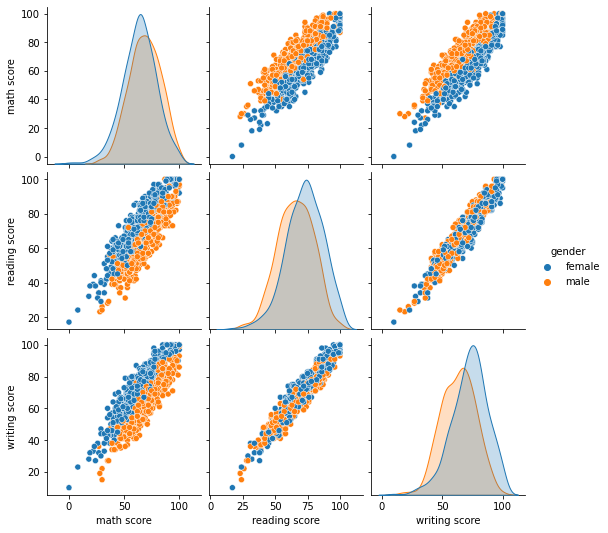

In [145]:
sns.pairplot(data, hue='gender', height=2.5)

From a pair plot above and the table with correlation between the scores in different subjects we can see that writting score and reading score corellate with each other very strongly. Their correlation is about 95%. Corellation between math score and writing score and between math core and reading score is almost the same, about 80%

In [146]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [147]:
descriptive_stats=data.describe(percentiles=[.5],include=[np.number])
descriptive_stats_short=descriptive_stats.drop(['count', 'min', 'max'], axis=0)
descriptive_stats_short=descriptive_stats_short.rename(index={"50%": "median"})
print(descriptive_stats_short)

        math score  reading score  writing score
mean      66.08900      69.169000      68.054000
std       15.16308      14.600192      15.195657
median    66.00000      70.000000      69.000000


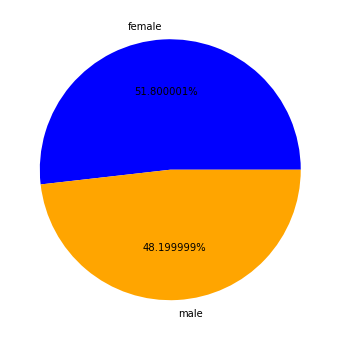

In [148]:
labels = data['gender'].value_counts().index
colors = ['blue','orange']
sizes = data['gender'].value_counts().values
plt.figure(figsize=(6,6))
plt.pie(sizes,labels=labels,colors=colors,autopct='%1f%%')
plt.show()

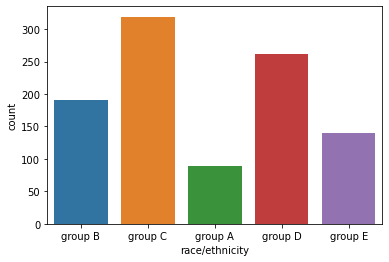

In [149]:
ax = sns.countplot(x="race/ethnicity", data = data) 

From the pie chart above and the count plot we can see that thre are 51% of females among the students and 49% of males. Most students belong to the group C, the second moct popular race group is D, while the least popular race group is A. 

In [150]:
data[["gender","writing score"]].groupby("gender").mean()

,writing score
gender,
female,72.467181
male,63.311203


In [151]:
data[["gender","math score"]].groupby("gender").mean()

,math score
gender,
female,63.633205
male,68.728216


In [152]:
data[["gender","reading score"]].groupby("gender").mean()

,reading score
gender,
female,72.608108
male,65.473029


Females got more scores in the writing exam ( the mean value is around 72 points for women and 63 for men) and in the reading exam (the mean value is around 72 points and 65 for men) . Men got more points then women only in the math exam(around 69 points for men and 64 for women).

<AxesSubplot:xlabel='gender', ylabel='writing score'>

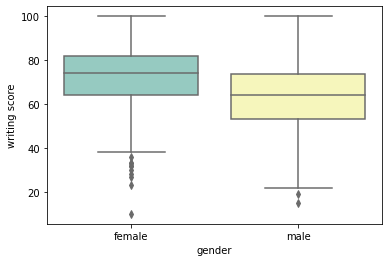

In [153]:
sns.boxplot(x = data.gender,y = data["writing score"], palette="Set3")

In [154]:
data[["gender","math score"]].groupby("gender").mean()

,math score
gender,
female,63.633205
male,68.728216


<AxesSubplot:xlabel='gender', ylabel='reading score'>

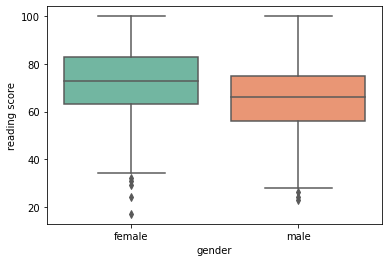

In [155]:
sns.boxplot(data.gender,data["reading score"], palette="Set2")

Female students seem to be better at reading and writing, than male students. Women's average scores in these exams are much higher then men's average scores in the same subjects. The lowerest score among remales for writting exam is about 40, while the lowerest score among men for the same exam is about 20. The best scores for both genders are the same - 100 points

In [156]:
data[["gender","reading score"]].groupby("gender").mean()

,reading score
gender,
female,72.608108
male,65.473029


<AxesSubplot:xlabel='gender', ylabel='math score'>

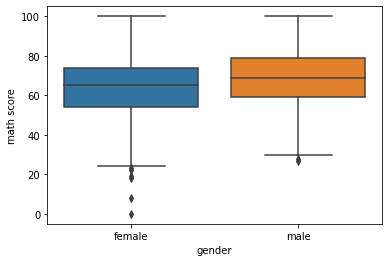

In [157]:
sns.boxplot(data.gender,data["math score"])


According to this box plot male students seem to be better at Math, then female students. Hovewer, the lowerest score for math exam among female students and male students is almost the same.  

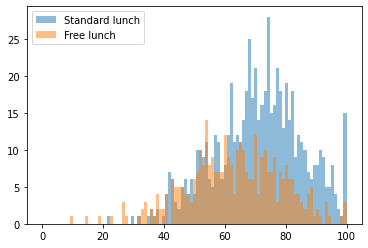

In [158]:
bins = np.linspace(0, 100, 100)
data_standard_lunch = data.loc[data['lunch']=='standard'][["writing score"]].to_numpy()
data_free_lunch = data.loc[data['lunch']=='free/reduced'][["writing score"]].to_numpy()
plt.hist(data_standard_lunch, bins, alpha=0.5, label='Standard lunch')
plt.hist(data_free_lunch, bins, alpha=0.5, label='Free lunch')
plt.legend(loc='upper left')
plt.show()

In this histogram we compare how marks for writting exam depend on what type of lunch does a student consume. As it turned out, people, who eat free lunches, which means that they are not that wealthy, have lower median and they are more likely to perform poorely in the exam. Poor children also have bigger dispersion, rather than wealthy children, who eat standart lunches. Children, who eat standard lunches are more likely to perfrom well in the exam.

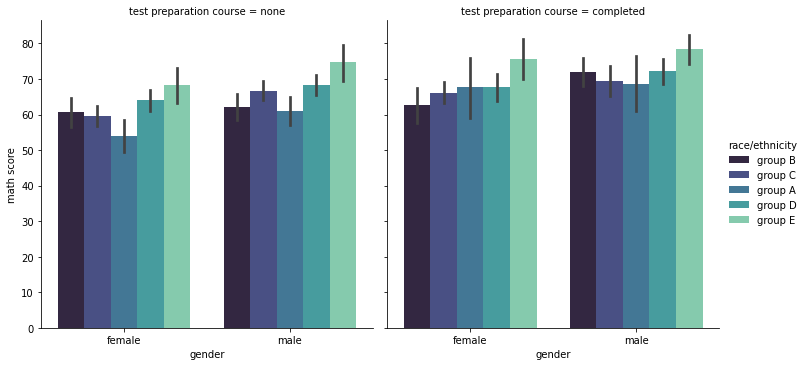

In [159]:
sns.catplot(x = "gender", y = "math score",hue = "race/ethnicity", kind = "bar",col = "test preparation course", data = data, palette = "mako")

From this bar chart we can see that the best scores for the math exam received students from a group E. It is clear that the results among people, who have completed a test preparation course, are also higher than among people, who have not attended this course. The worst results showed females from the group A,55 points, who have not attended preparational course. The best results were among males from the group E, 80 points, that prepared for the exam in the course.Female students, who prepared for the exam, from the groups D and A have shown the same result. Points received by students from the groups B and C are also almost alike.

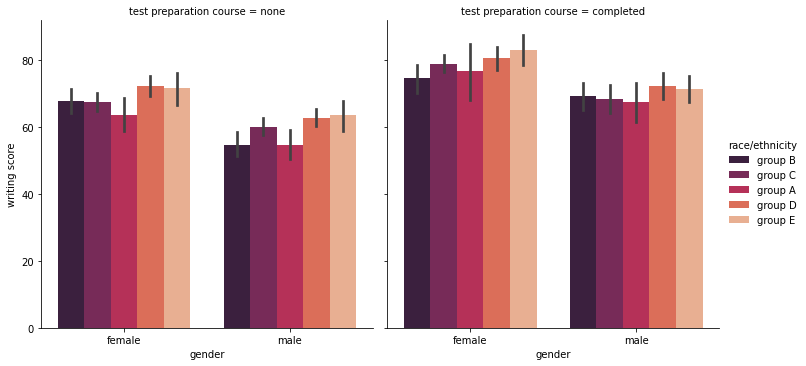

In [160]:
sns.catplot(x = "gender", y = "writing score",hue = "race/ethnicity", kind = "bar",col = "test preparation course", data = data, palette = "rocket")

The bar chart above shows that the best results in the writing exam have shown females from the group E, who have finished the preparational course. It is aroud 95 points. The worst results have shown males from the group A,approximately 55 points, who have not prepared for the exam. People who have prepared for the exam in the special course in average showed better results, than students, who did not finish this course. Student from the groups B and C have showed almost the same results.

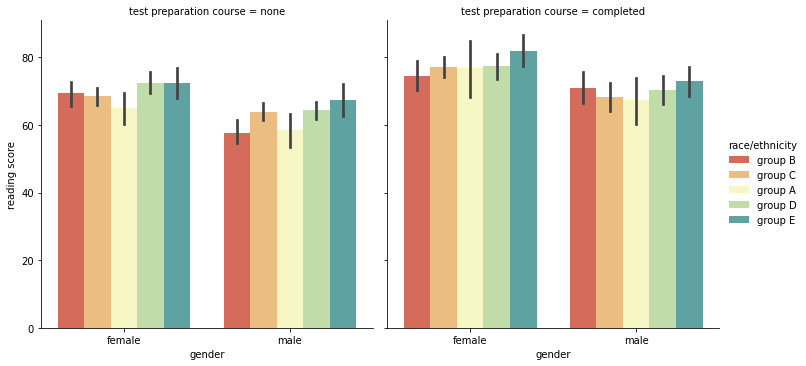

In [161]:
sns.catplot(x = "gender", y = "reading score",hue = "race/ethnicity", kind = "bar",col = "test preparation course", data = data, palette = "Spectral")

From this bar chart it is clear that the best results has shown group E, espesially females from this group, while the worst results has shown grouop A.The best score for writting exam is around 80 points, it was recieved by a female student from a group E, who have attended preparational course. The worst result, about 55 points,  have shown male students from a group A without any preparation. Female students, who have not attended the course, from the groups B and C fot the same points for reading exam.

(0.0, 5.0)

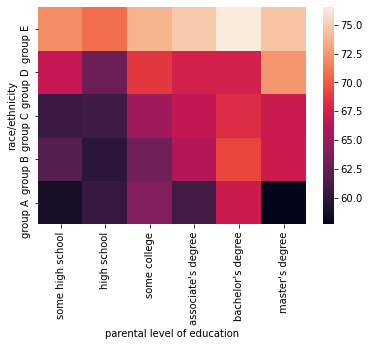

In [162]:
heatdata = pd.pivot_table(data, values="math score", index=["race/ethnicity"],
                    columns=["parental level of education"], aggfunc=np.mean, fill_value=0)

cols_educ=["some high school","high school","some college","associate's degree","bachelor's degree","master's degree"]
heatdata=heatdata[cols_educ]
ax = sns.heatmap(heatdata)
ax.set_ylim([0,5])

From this heat map it is clear that people form a group E, whose parents have bachelor's degree are more likely to get a very high score, more than 75 points. Students, who belong to the E group, are also likely to show a good result in the exam around 72.5 points if their parents either associate's degree or master's degree.
<br>
Students from a group A, whose parents have gor a master's degree, usually get very little points in the exams, less than 60 points.

Overall, female students performed better in the writting exam and in the reading exam, while male students are better at Math.
<br>
Students, who have finished the preparational course, showed much better results in all exams, rather than students, who did not attend this course. This means that this course trully helps in preparation for the exam.
<br>
Students, who eat standard lunches and are wealthier than students, who get free lunches, are more likely to show better results in all types of the exams, while poor students can easily get a very low mark for their exam, less then60 points.
<br>
In general, people, who belong to the group E showed the best results in all types of the exams. 
<br>
Students, who belong to the group A are the most likely to fail their exams as their results were always the lowerest out of all ethnic groups.